 **Q.1 What is Logistic Regression, and how does it differ from Linear
Regression?**

Ans:

Logistic Regression is a supervised learning algorithm used for classification tasks (not regression, despite its name).

It predicts the probability that a given input belongs to a certain class (usually binary: 0 or 1).

Instead of fitting a straight line, it uses the logistic (sigmoid) function to squeeze output values into the range [0, 1].

👉 Example: Predicting if an email is spam (1) or not spam (0).
    p=1/(1+e−(b0​+b1​x))

   if p>=0.5 class =1
   if p< 0.5 class =0

   Use Linear Regression when predicting numbers.

Use Logistic Regression when predicting categories.



**Ques 2: Explain the role of the Sigmoid function in Logistic Regression.**

Ans:

The sigmoid function acts as a squashing function that transforms the linear output of Logistic Regression into a probability (0–1), enabling classification.




**Q3. What is Regularization in Logistic Regression and why is it needed?**

Ans:

Regularization is a technique used to prevent overfitting by adding a penalty term to the cost function (loss function).

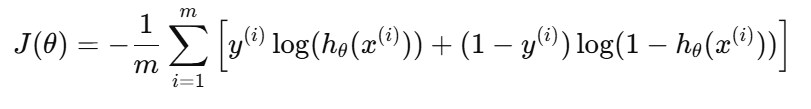

Regularization modifies this cost function by adding a penalty on large coefficients (weights).

**Types OF regularization**

i)L2 Regularization (Ridge)

ii)L1 Regularization (Lasso)
iii)Elastic Net(L1+L2)


Why is Regularization Needed?

**Prevents Overfitting:**

Without regularization, Logistic Regression may assign very large weights to some features, making the model fit training data too closely but perform poorly on unseen data.

**Improves Generalization:**

By shrinking coefficients, the model becomes simpler and more robust on new data.

**Feature Selection (with L1):**

Eliminates irrelevant features by pushing their weights to zero.

**Question4:What are some common evaluation metrics for classification models, and why are they important?**

Ans:
i)Confusion Matrix
ii)Accuracy
iii)Precision
iv) f-beta score
v)True Position Rate
vi)False Postive Rate
vii) True negative Rate
viii) Roc-Auc
ix) Recall
x) Precison-Recall /Sensitivity -Specificity trade Off.

Classification models are evaluated with metrics like Accuracy, Precision, Recall, F1-score, AUC-ROC, Log Loss, and Confusion Matrix. These metrics are important because they provide a deeper understanding of model performance, especially in situations where accuracy alone is misleading.



In [11]:
# Question 5: Write a Python program that loads a CSV file into a Pandas DataFrame,
# splits into train/test sets, trains a Logistic Regression model, and prints its accuracy.
# (Use Dataset from sklearn package)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

data=load_iris()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['target']=data.target
x=df.drop('target',axis=1)
y=df.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy}")

Accuracy:1.0


In [12]:
# Write a Python program to train a Logistic Regression model using L2
# regularization (Ridge) and print the model coefficients and accuracy.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

data=load_iris()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['target']=data.target
x=df.drop('target',axis=1)
y=df.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LogisticRegression(penalty='l2',solver="lbfgs")
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("coefficient",model.coef_)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy}")

coefficient [[-0.39345607  0.96251768 -2.37512436 -0.99874594]
 [ 0.50843279 -0.25482714 -0.21301129 -0.77574766]
 [-0.11497673 -0.70769055  2.58813565  1.7744936 ]]
Accuracy:1.0


In [16]:
# Question 7: Write a Python program to train a Logistic Regression model for multiclass
# classification using multi_class='ovr' and print the classification report.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris

data=load_iris()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['target']=data.target
x=df.drop('target',axis=1)
y=df.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LogisticRegression(multi_class='ovr')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
classification_report=classification_report(y_test,y_pred)
print(classification_report)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [25]:
# Question 8: Write a Python program to apply GridSearchCV to tune C and penalty
# hyperparameters for Logistic Regression and print the best parameters and validation
# accuracy.

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data = load_breast_cancer()

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Define Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, solver='saga')
# 'saga' supports both L1 and L2 penalties

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],   # Regularization strength (inverse of λ)
    'penalty': ['l1', 'l2']         # L1 (Lasso) and L2 (Ridge)
}

# Apply GridSearchCV
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1
)
# Fit model
grid_search.fit(X_train, y_train)

# Print best parameters and validation accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Test set accuracy
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Best Parameters: {'C': 0.01, 'penalty': 'l2'}
Best Cross-Validation Accuracy: 0.9164835164835166
Test Accuracy: 0.9649122807017544


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [31]:
# Question 9: Write a Python program to standardize the features before training Logistic
# Regression and compare the model's accuracy with and without scaling.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris

data=load_iris()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['target']=data.target
x=df.drop('target',axis=1)
y=df.target
#without scaling
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LogisticRegression(penalty='l2')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
classification_report1=classification_report(y_test,y_pred)
print(classification_report1)

#with scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)
model=LogisticRegression(penalty='l2')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
classification_report2=classification_report(y_test,y_pred)
print(classification_report2)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
# Question 10: Imagine you are working at an e-commerce company that wants to
# predict which customers will respond to a marketing campaign. Given an imbalanced
# dataset (only 5% of customers respond), describe the approach you’d take to build a
# Logistic Regression model — including data handling, feature scaling, balancing
# classes, hyperparameter tuning, and evaluating the model for this real-world business
# use case.


# Import libraries
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc

# 1. Create an imbalanced dataset (5% positive class)
X, y = make_classification(n_samples=5000, n_features=20, n_informative=10,
                           n_redundant=5, n_classes=2, weights=[0.95, 0.05],
                           random_state=42)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. Build pipeline (scaling + logistic regression)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(solver='saga', max_iter=1000))
])

# 4. Define hyperparameter grid
param_grid = {
    'log_reg__C': [0.01, 0.1, 1, 10],
    'log_reg__penalty': ['l1', 'l2'],
    'log_reg__class_weight': [None, 'balanced']
}

# 5. GridSearchCV for tuning
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',   # better for imbalanced data
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# 6. Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# 7. Predictions
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# 8. Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", pr_auc)
